# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

### Суханова Элина

## Занятие №0. Core libraries. Разминка.

In [1]:
import sys

**Как получить путь к интерпретатору?**

In [2]:
sys.executable;

**Как узнать, где ищутся модули для импорта?**

In [3]:
sys.path;

**Что может помочь написать кросс-платформенный код?**

In [4]:
sys.platform

'win32'

**Как перенаправить поток вывода?**

In [5]:
with open('log.txt', 'w') as f:
    print(2, file=f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [6]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [7]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [8]:
import this

In [9]:
sys.stdout = stdout 

In [10]:
import re
from collections import Counter, OrderedDict

In [11]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [12]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [28]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [1]:
# Bad way

def delete_zeros_from_array(array):
    #     logic for deleting zeroes
    pass

In [2]:
# Not bad way

from functools import partial

def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    return([x for x in array if x != 0])
    
delete_zeros_from_array = partial(delete_elements_from_array, element=0)

Проверим, что функция работает

In [3]:
delete_zeros_from_array([0,0,1,3,0,5])

[1, 3, 5]

Построим график зависимости времени работы функции от длины массива

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import time
from tqdm import tqdm
import numpy as np

In [7]:
a = np.arange(6) # задаем цифры от 0 до 5
p_a = [0.40, 0.12, 0.12, 0.12, 0.12, 0.12] # задаем вероятность цифр, для 0 > 33%
end_time = dict()
for n in tqdm(range(1,100001,1)):
    my_array = np.random.choice(a, n, p=p_a)
    start_time = time.time()
    delete_zeros_from_array(my_array)
    end_time[n] = time.time() - start_time

100%|██████████| 100000/100000 [26:42<00:00, 62.41it/s]


Text(0, 0.5, 'time')

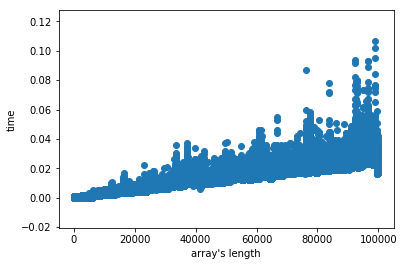

In [9]:
plt.scatter(end_time.keys(), end_time.values())
plt.xlabel("array's length")
plt.ylabel('time')

Видим, что с увеличением длины массива ~ линейно растет время работы функции

Зачем нужна doc string? Как её посмотерть?

doc string описывает назначение функции, входные параметры и их типы, результат работы функции. С ее помощью просто разобраться в функции, написанной другим человеком.

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [28]:
def module_complex(z):
    """
        This function returns module of complex number z. 
        
        :param z: complex number
        :type z: complex
        
        :returns: module of complex number
        :rtype: float
    """
    return(math.sqrt(z.real**2 + z.imag**2))
    
def min_complex(a,b,c):
    """
        This function returns the minimum of 3 complex numbers modulo. 
        
        :param a: complex number
        :type a: complex
        
        :param b: complex number
        :type b: complex
        
        :param c: complex number
        :type c: complex
        
        :returns: minimum of 3 complex numbers modulo
        :rtype: complex
    """
    complex_dict = {a:abs(module_complex(a)),
                   b:abs(module_complex(b)),
                   c:abs(module_complex(c))}
    if complex_dict[a] <= complex_dict[b]:
        if complex_dict[a] <= complex_dict[c]:
            return(a)
        else:
            return(c)
    else:
        if complex_dict[b] <= complex_dict[c]:
            return(b)
        else:
            return(c)

In [29]:
min_complex(complex(1, 2), complex(3,4), complex(5,6))

(1+2j)

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [11]:
import textwrap
from functools import lru_cache
import itertools

In [12]:
@lru_cache(maxsize=None)
def get_fibonacci(n):
    """
        This function returns fibonacci number number n. 
        
        :param n: number of fibonacci number
        :type n: int
        
        :returns: fibonacci number number n
        :rtype: int
    """
    if n < 2:
        return n
    return get_fibonacci(n-1) + get_fibonacci(n-2)

def gcd(a, b):
    """
        This function returns gcd of 2 numbers. 
        
        :param a: number 1
        :type a: int
        
        :param b: number 2
        :type b: int
        
        :returns: gcd of a and b
        :rtype: int
    """
    while a != 0 and b != 0: # Алгоритм Евклида
        if a > b:
            a = a % b
        else:
            b = b % a
    return(int(a + b))

def ATM(card_number, password):
    """
        This function acts like an ATM. 
        
        :param card_number: card nuber
        :type card_number: string
        
        :param password: password
        :type password: int
        
        :returns: number
        :rtype: int
    """
    numbers = [int(i) for i in textwrap.wrap(card_number, 4)] # делим номер карты на 4 числа
    # считаем соответствующие числа Фибоначчи
    fib_numbers = [str(get_fibonacci(numbers[0])), str(get_fibonacci(numbers[1])), str(get_fibonacci(numbers[2])), str(get_fibonacci(numbers[3]))]
    items = itertools.permutations(fib_numbers) # составляем всевозможные перестановки полученных чисел Фибоначчи
    gcd_list = []
    for item in items:
        gcd_list.append(gcd(int("".join(item)), password)) # считаем НОД каждой перестановки с паролем
    return(np.median(gcd_list))

Проверяем, что все работает

In [13]:
ATM('0001000200030004', 12345)

1.0

Для нахождения чисел Фибоначчи использовали рекурсию. Засчет @lru_cache функция не будет каждый раз пересчитывать все дерево с нуля.

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.